# Image Classifier - Savory / Unsavory

* Savory = pleasant / morally acceptable
* Unsavory = unpleasant / morally unacceptable

In [52]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
my_data_dir = "/content/drive/MyDrive/data"

In [3]:
os.listdir(my_data_dir)

['train', 'valid', 'images to predict', 'test']

In [4]:
train_path = my_data_dir + '/train'
test_path = my_data_dir + '/test'

In [5]:
os.listdir(train_path)

['unsavory', 'savory']

In [6]:
os.listdir(test_path)

['savory', 'unsavory']

In [8]:
train_savory = len(os.listdir(train_path + '/savory'))
train_unsavory = len(os.listdir(train_path + '/unsavory'))
print(f"Training Data: ")
print(f"Savory = {train_savory}")
print(f"Unavory = {train_unsavory}")
print(f"Total = {train_savory + train_unsavory}")

Training Data: 
Savory = 5610
Unavory = 5610
Total = 11220


In [9]:
test_savory = len(os.listdir(test_path + '/savory'))
test_unsavory = len(os.listdir(test_path + '/unsavory'))
print(f"Testing Data: ")
print(f"Savory = {test_savory}")
print(f"Unavory = {test_unsavory}")
print(f"Total = {test_savory + test_unsavory}")

Testing Data: 
Savory = 300
Unavory = 300
Total = 600


In [11]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path + '/savory'):
    img = imread(test_path + '/savory/' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

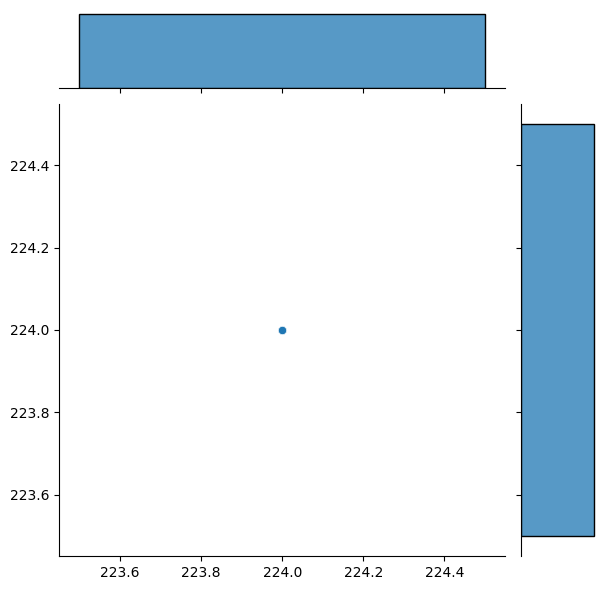

In [15]:
sns.jointplot(x=dim1, y=dim2)

In [19]:
image_shape = (dim1[0], dim2[0], 3)
print(f"Input Image Shape = {image_shape}")

Input Image Shape = (224, 224, 3)


In [21]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [22]:
image_gen.flow_from_directory(train_path)

Found 11220 images belonging to 2 classes.


In [23]:
image_gen.flow_from_directory(test_path)

Found 600 images belonging to 2 classes.


In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
batch_size = 100

In [30]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 11220 images belonging to 2 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 600 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'savory': 0, 'unsavory': 1}

In [33]:
results = model.fit_generator(train_image_gen,epochs=200,
                               validation_data=test_image_gen,
                             callbacks=[early_stop])

<ipython-input-33-ad05ed1ff5d8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=200,


Epoch 1/200
702/702 [==============================] - 7841s 11s/step - loss: 0.5552 - accuracy: 0.7034 - val_loss: 0.3344 - val_accuracy: 0.8450
Epoch 2/200
702/702 [==============================] - 1234s 2s/step - loss: 0.4448 - accuracy: 0.7944 - val_loss: 0.3306 - val_accuracy: 0.8383
Epoch 3/200
702/702 [==============================] - 1224s 2s/step - loss: 0.4059 - accuracy: 0.8139 - val_loss: 0.2421 - val_accuracy: 0.9067
Epoch 4/200
702/702 [==============================] - 1213s 2s/step - loss: 0.3695 - accuracy: 0.8345 - val_loss: 0.2455 - val_accuracy: 0.8883
Epoch 5/200
702/702 [==============================] - 1214s 2s/step - loss: 0.3432 - accuracy: 0.8480 - val_loss: 0.2554 - val_accuracy: 0.8933


In [34]:
from tensorflow.keras.models import load_model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
model.save("savory_detector.tflite")

In [36]:
model.save('savory_detector.keras')

## Evaluating the Model

In [37]:
losses = pd.DataFrame(model.history.history)

<Axes: >

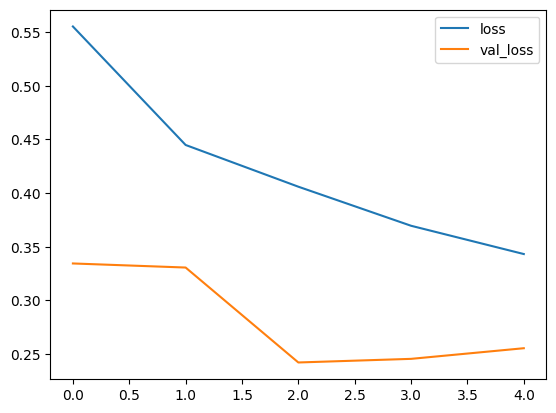

In [38]:
losses[['loss','val_loss']].plot()

In [41]:
loss, accuracy = model.evaluate_generator(test_image_gen)

<ipython-input-41-d4a9ed3f07f0>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(test_image_gen)


In [44]:
print(f"Accuracy = {round(accuracy*100,2)}%")

Accuracy = 90.5%


In [45]:
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

<ipython-input-45-afb618466232>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


array([[5.79125643e-01],
       [2.50640005e-01],
       [1.84242483e-02],
       [1.08368382e-01],
       [7.98985898e-01],
       [3.20815265e-01],
       [1.48460478e-01],
       [3.38557623e-02],
       [3.02490860e-01],
       [2.75266558e-01],
       [9.23464775e-01],
       [1.31511569e-01],
       [4.86313730e-01],
       [1.75351515e-01],
       [9.33161844e-03],
       [1.69089511e-01],
       [4.51119721e-01],
       [1.41396821e-01],
       [3.77037466e-01],
       [3.28645796e-01],
       [1.60695642e-01],
       [2.78037906e-01],
       [1.61935180e-01],
       [2.10256092e-02],
       [3.94953638e-01],
       [2.47841194e-01],
       [6.55524194e-01],
       [9.69247341e-01],
       [4.88265336e-01],
       [4.45480347e-01],
       [1.17581710e-01],
       [8.74654204e-02],
       [2.10014388e-01],
       [7.25136399e-02],
       [2.80766517e-01],
       [3.32667619e-01],
       [1.17236681e-01],
       [5.37145585e-02],
       [6.27644360e-01],
       [1.80899441e-01],


In [46]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [48]:
predictions = pred_probabilities > 0.5

In [49]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       300
           1       0.94      0.89      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [50]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[284  16]
 [ 32 268]]


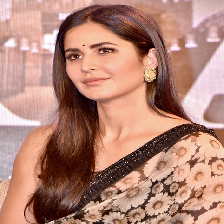

In [69]:
my_image = image.load_img("/content/drive/MyDrive/data/test_image.jpg",target_size=image_shape)
my_image

In [70]:
my_image = image.img_to_array(my_image)

In [71]:
my_image = np.expand_dims(my_image, axis=0)

In [72]:
my_image.shape

(1, 224, 224, 3)

In [73]:
train_image_gen.class_indices

{'savory': 0, 'unsavory': 1}

In [74]:
def get_output(val):
  return "Savory" if val == 0 else "Unsavory"

In [75]:
output = get_output(model.predict(my_image))

1/1 [==============================] - 0s 78ms/step


In [77]:
print(f"Output= {output}")

Output= Savory


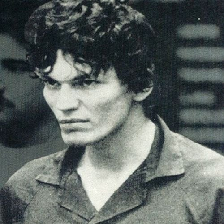

In [78]:
my_image = image.load_img("/content/drive/MyDrive/data/test_image_2.jpg",target_size=image_shape)
my_image

In [79]:
my_image = image.img_to_array(my_image)

In [80]:
my_image = np.expand_dims(my_image, axis=0)

In [81]:
my_image.shape

(1, 224, 224, 3)

In [82]:
output = get_output(model.predict(my_image))

1/1 [==============================] - 0s 70ms/step


In [83]:
print(f"Output= {output}")

Output= Unsavory
